# Homework 1 section
## Class: (602) Introduction to Machine Learning
* Professor: Dr. Ozgur Ozturk
* Author for 'Homework 1 Section': Mr. Levan Sulimanov

# Machine Learning Example Case: 
House Sale Price Prediction (like Zillow's "zestimate") 

When you see a line starting with "TASK", do that task!

### TASK: Click on the next cell and press shift-enter
You will get the code in it get executed.   
The result of last command or representation of last varible in that cell will be displayed 

In [46]:
import pandas as pd
housing = pd.read_csv('data/housing_processed.csv')
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,GarageType_NA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,65.0,8450,7,5,2003,2003,196.0,Gd,...,0,0,0,0,0,0,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,TA,...,0,0,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,Gd,...,0,0,0,0,0,0,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,TA,...,0,0,0,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,Gd,...,0,0,0,0,0,0,0,0,0,1


### Filtering Columns
Some columns were not removed when equivalent coded ones were created

In [47]:
housing[["ExterQual","ExterQual_Coded"]].head()

,ExterQual,ExterQual_Coded
0,Gd,3
1,TA,2
2,Gd,3
3,TA,2
4,Gd,3


### Filtering in a series
dtypes returns a series   
filtering series and dataframes are similar

In [48]:
type(housing.dtypes==object)

pandas.core.series.Series

In [49]:
housing.dtypes[housing.dtypes==object]

ExterQual       object
ExterCond       object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
HeatingQC       object
CentralAir      object
KitchenQual     object
Functional      object
FireplaceQu     object
GarageFinish    object
GarageQual      object
GarageCond      object
PavedDrive      object
dtype: object

In [50]:
housing.dtypes[housing.dtypes==object].shape

(16,)

In [51]:
"SalePrice" in housing.columns 

True

### Removing Undesired Columns
In my case, my colleague had left above non-numeric columns in preprocessing, after creating corresponding coded versions

In [52]:
len(housing.columns)

238

In [53]:
# We could drop columns by name:
housing_ml = housing.drop(columns=["ExterQual"])

In [54]:
# or wholesale, keeping only numeric:
housing_ml = housing.loc[:,housing.dtypes != object]

In [55]:
len(housing_ml.columns)

222

# Separate Target into new Variable
- "SalePrice" is the target.    
 - The value we want to predict from other values (features) for a house.  
- Currently it is a column like the other features.   
- Scikit-learn needs 2 variables: features (X) and target (y) to be Predicted into its own 1-D array 

# NumPy
- Both Pandas and scikit-learn are build on top of NumPy
- scikit-learn can not directly work on dataframes
- X and y data type needs to be NumPy "ndarrays"

In [56]:
housing_ml.shape

(1460, 222)

In [57]:
# Split data as features and target
# take "SalePrice" values into its own 1-D array 
sale_price = housing_ml.pop('SalePrice')
type(sale_price)

pandas.core.series.Series

In [58]:
# pop removes the column
# "in place" operation
# now housing_ml has one less column
housing_ml.shape

(1460, 221)

In [59]:
y = sale_price.values
type(y)

numpy.ndarray

# See what other methods are available for ndarray

In [60]:
# press tab after putting cursor after dot "."
#y. #uncomment, press tab after . 

In [61]:
y.shape
# (1460,)
# it is equivalent to (1460)
# means it is a 1-d array

(1460,)

### TASK: get ndarray version of feature dataframe put it onto variable X

In [62]:
X = housing_ml.values

### TASK: check the shape of X

In [63]:
X.shape

(1460, 221)

### TASK: programmatically check if X and y has matching number of rows
You

In [64]:
X.shape[0] == y.shape[0]

True

# First Model
Q: What would you do if you had no features?

A: You would always estimatate the average house price.

We will have to do much better than that.  
We have so much data to base our decision on.   
It can still serve us as a baseline to compare.   
An inferior baseline could be: random in the range or max and min in training data. 

In [65]:
# Import estimator
from sklearn.dummy import DummyRegressor
# Instantiate estimator
# guess the mean every single time
mean_reg = DummyRegressor(strategy='mean')
# fit estimator
mean_reg.fit(X, y)

DummyRegressor()

In [66]:
# predict
mean_reg.predict(X)

array([180921.19589041, 180921.19589041, 180921.19589041, ...,
       180921.19589041, 180921.19589041, 180921.19589041])

## Evaluating The Model
scikit-learn regressors have a score function.   
It gives you how much better your model does compared to worst model
Technically: what percentage of the variance has decreased over the worst model

"Mean" *is* the worst model, so its score will be 0.

In [67]:
mean_reg.score(X, y)

0.0

## Fitting a linear model 
First, let's use only one feature 

In [68]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [69]:
X_lf = housing_ml[['LotFrontage']]

In [70]:
linear_model.fit(X_lf, y)

LinearRegression()

Above, you see that it used defaults to create the estimator.   
You could google "LinearRegression sklearn" and find the documentation:
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
to see the options for the other parameters.

In [71]:
y_pred = linear_model.predict(X_lf)

In [72]:
linear_model.score(X_lf, y)

0.11215612336205594

### Chart Showing the Linear Fit
matplotlib is the most common visualization library

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

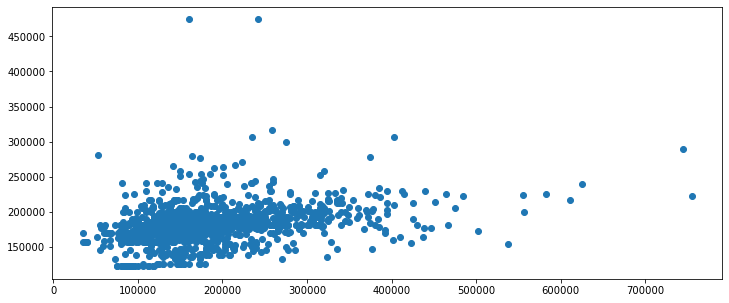

In [74]:
plt.figure(figsize=(12, 5))
plt.scatter(y, y_pred);

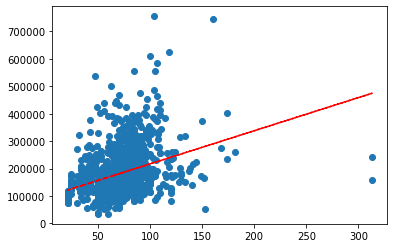

In [75]:
plt.scatter(X_lf,y)
plt.plot(X_lf,y_pred,'r--')

### TASK: add labels to these charts
search label:
https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py


### Task: try replacing scatter with plot
Do you see why scatter is needed for data rows.
Try also replacing plot with scatter. 

# Effect of using a Better predictor 
Ground Living Area should be better than Lot Frontage!

In [76]:
X_area = housing_ml[['GrLivArea']]

In [77]:
linear_model.fit(X_area, y)

LinearRegression()

Now the linear_model has another model in it

In [78]:
y_pred2 = linear_model.predict(X_area)
linear_model.score(X_area, y)

0.5021486502718042

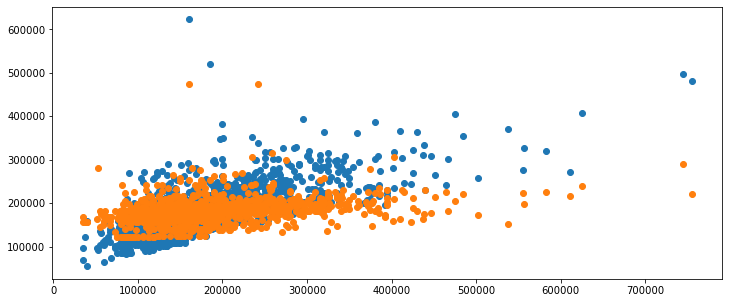

In [79]:
plt.figure(figsize=(12, 5))
plt.scatter(y, y_pred2); # blue obviously better
plt.scatter(y, y_pred); # orange

### TASK: add legend
which color is the prediction based on which feature

# Using all predictors!

In [80]:
# We had 81 columns (80 features) in original dataset,
# coded as 221 features!
X.shape

(1460, 221)

In [81]:
linear_model.fit(X, y)

LinearRegression()

In [82]:
y_pred3 = linear_model.predict(X)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [83]:
linear_model.score(X, y)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.9184728890914109

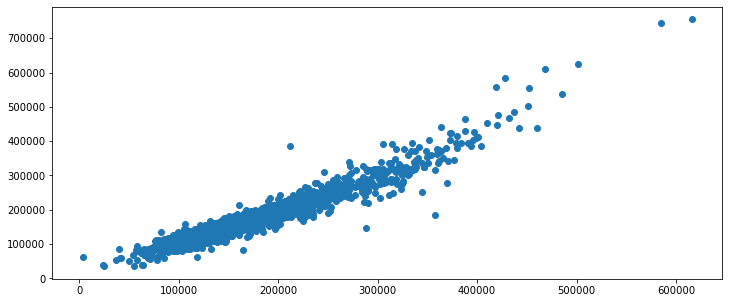

In [84]:
plt.figure(figsize=(12, 5))
plt.scatter(y_pred3, y);

# Homework 1 section

After running the cells, add code to this notebook to achieve the following:

# 1)    Split the data for training and testing, to use 80 percent as training data.

use 21 as your randomization seed (so you achieve same results for us to grade).

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

random_state = 21


train_size = .8

In the following steps use training set to fit the model, and test set to evaluate it.

In [256]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error
import operator
from itertools import combinations
from sklearn.neighbors import KNeighborsRegressor

In [257]:
print(X.shape)
print(y.shape)

(1460, 221)
(1460,)


In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21)

In [259]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("")
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (1168, 221)
X_test.shape: (292, 221)

y_train.shape: (1168,)
y_test.shape: (292,)


# 2)    Analyze which feature alone would give the best prediction, list the scores and RMSE errors achieved by the top 10 predictors by score.

In [260]:
print("Number of features:", len(housing_ml.columns))

Number of features: 221


In [261]:
X_train[:, 0].reshape(-1, 1).shape

(1168, 1)

In [262]:
feature_lst = list(housing_ml.columns)
feature_dict = {}

for f in range(0, len(feature_lst)):
    
    # training on single feature
    single_feat_train_data = X_train[:, f].reshape(-1, 1)
    single_feat_test_data = X_test[:, f].reshape(-1, 1)
    
    curr_linear_model = LinearRegression()
    curr_linear_model.fit(single_feat_train_data, y_train)
    curr_y_pred = curr_linear_model.predict(single_feat_test_data)
    
    curr_score = curr_linear_model.score(single_feat_test_data, y_test)
    curr_rmse = mean_squared_error(y_test, curr_y_pred, squared=False)
    # print("{} Feature's Score: {}".format(feature_lst[f], curr_score))
    # print("{} RMSE: {}".format(feature_lst[f], curr_rmse))
    # print("")
    col_indx = f
    
    feature_dict[f] = [feature_lst[f], curr_score, curr_rmse, col_indx]   

In [263]:
sorted_by_score_top_10 = sorted(feature_dict.values(), key=operator.itemgetter(1), reverse=True)[:10]

In [264]:
for best in sorted_by_score_top_10:
    print("{} [with indx={}] Feature's RMSE = {} with Score = {}".format(best[0], best[3], round(best[2], 2), round(best[1], 2)))
    print("")

OverallQual [with indx=4] Feature's RMSE = 49018.44 with Score = 0.65

ExterQual_Coded [with indx=36] Feature's RMSE = 58260.15 with Score = 0.5

GrLivArea [with indx=16] Feature's RMSE = 61369.56 with Score = 0.44

KitchenQual_Coded [with indx=44] Feature's RMSE = 61622.3 with Score = 0.44

TotalBsmtSF [with indx=12] Feature's RMSE = 62430.33 with Score = 0.42

1stFlrSF [with indx=13] Feature's RMSE = 62876.26 with Score = 0.42

GarageCars [with indx=25] Feature's RMSE = 63131.02 with Score = 0.41

GarageArea [with indx=26] Feature's RMSE = 63377.71 with Score = 0.41

BsmtQual_Coded [with indx=38] Feature's RMSE = 66831.52 with Score = 0.34

GarageFinish_Coded [with indx=47] Feature's RMSE = 68071.65 with Score = 0.32



# 3)    Select all possible 2 pairs of these top 10 predictors, and train 45 linear models, list the scores and RMSE errors achieved by the top 10 predictors by score.

In [265]:
get_col_indx = []
for idx in sorted_by_score_top_10:
    get_col_indx.append(idx[3])
print("Column indexes based on top 10 performing models:", get_col_indx)

Column indexes based on top 10 performing models: [4, 36, 16, 44, 12, 13, 25, 26, 38, 47]


In [266]:
# get all pair combinations from this list:
best_pairs = list(combinations(get_col_indx, 2))
print("Best pairs:", best_pairs)
print("")
print("Number of best pairs:", len(best_pairs))

Best pairs: [(4, 36), (4, 16), (4, 44), (4, 12), (4, 13), (4, 25), (4, 26), (4, 38), (4, 47), (36, 16), (36, 44), (36, 12), (36, 13), (36, 25), (36, 26), (36, 38), (36, 47), (16, 44), (16, 12), (16, 13), (16, 25), (16, 26), (16, 38), (16, 47), (44, 12), (44, 13), (44, 25), (44, 26), (44, 38), (44, 47), (12, 13), (12, 25), (12, 26), (12, 38), (12, 47), (13, 25), (13, 26), (13, 38), (13, 47), (25, 26), (25, 38), (25, 47), (26, 38), (26, 47), (38, 47)]

Number of best pairs: 45


In [267]:
X_train[:, (4,36)].shape

(1168, 2)

In [268]:
housing_ml.columns[[0,2]]

Index(['Id', 'LotFrontage'], dtype='object')

In [269]:
feature_lst = housing_ml.columns
feature_dict_best_pairs = {}


for curr_pair in best_pairs:
    
    pair = list(curr_pair)
    
    pair_feat_train_data = X_train[:, pair]
    pair_feat_test_data = X_test[:, pair]
    
    curr_pair_feat_linear_model = LinearRegression()
    curr_pair_feat_linear_model.fit(pair_feat_train_data, y_train)
    curr_pair_feat_y_pred = curr_pair_feat_linear_model.predict(pair_feat_test_data)
    
    curr_pair_feat_score = curr_pair_feat_linear_model.score(pair_feat_test_data, y_test)
    curr_pair_feat_rmse = mean_squared_error(y_test, curr_pair_feat_y_pred, squared=False)

    col_indx = "_and_".join(list(feature_lst[pair]))
    
    feature_dict_best_pairs[col_indx] = [col_indx, curr_pair_feat_score, curr_pair_feat_rmse, pair]

In [270]:
sorted_by_score_pair_45_top_10 = sorted(feature_dict_best_pairs.values(), key=operator.itemgetter(1), reverse=True)[:10]

for best in sorted_by_score_pair_45_top_10:
    print("{} [with indx={}] Feature's RMSE = {} with Score = {}".format(best[0], best[3], round(best[2], 2), round(best[1], 2)))

OverallQual_and_1stFlrSF [with indx=[4, 13]] Feature's RMSE = 43764.69 with Score = 0.72
OverallQual_and_TotalBsmtSF [with indx=[4, 12]] Feature's RMSE = 44577.66 with Score = 0.71
OverallQual_and_GrLivArea [with indx=[4, 16]] Feature's RMSE = 45673.47 with Score = 0.69
OverallQual_and_GarageArea [with indx=[4, 26]] Feature's RMSE = 46468.13 with Score = 0.68
OverallQual_and_KitchenQual_Coded [with indx=[4, 44]] Feature's RMSE = 47070.07 with Score = 0.67
OverallQual_and_GarageCars [with indx=[4, 25]] Feature's RMSE = 47124.91 with Score = 0.67
OverallQual_and_ExterQual_Coded [with indx=[4, 36]] Feature's RMSE = 47433.82 with Score = 0.67
OverallQual_and_BsmtQual_Coded [with indx=[4, 38]] Feature's RMSE = 48237.75 with Score = 0.66
OverallQual_and_GarageFinish_Coded [with indx=[4, 47]] Feature's RMSE = 48571.27 with Score = 0.65
ExterQual_Coded_and_1stFlrSF [with indx=[36, 13]] Feature's RMSE = 49640.64 with Score = 0.64


# 4)    Train a single model using all features. Calculate RMSE and score. Observe how much of the prediction power was in the 2 pairs, vs all features.

In [271]:
all_feat_linear_model = LinearRegression()
all_feat_linear_model.fit(X_train, y_train)
all_feat_y_pred = all_feat_linear_model.predict(X_test)
    
all_feat_score = all_feat_linear_model.score(X_test, y_test)
all_feat_rmse = mean_squared_error(y_test, all_feat_y_pred, squared=False)

curr_all_feat_score = all_feat_linear_model.score(X_test, y_test)
curr_all_feat_rmse = mean_squared_error(y_test, all_feat_y_pred, squared=False)

print("All feature score:", curr_all_feat_score)
print("RMSE Score:", curr_all_feat_rmse)

All feature score: 0.8127547098528441
RMSE Score: 35623.30345000228


# 5)    Use the 5NN and 10NN regressor with all features, and list the RMSE and score for these 2 models

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [272]:
# 5NN regressor
knn_5_model = KNeighborsRegressor(n_neighbors=5)
knn_5_model.fit(X_train, y_train)
y_pred_knn_5 = knn_5_model.predict(X_test)

knn_5_score = knn_5_model.score(X_test, y_test)
knn_5_rmse = mean_squared_error(y_test, y_pred_knn_5, squared=False)

print("KNN 5's Score:", knn_5_score)
print("KNN 5's RMSE:", knn_5_rmse)

# 10NN regressor
knn_10_model = KNeighborsRegressor(n_neighbors=10)
knn_10_model.fit(X_train, y_train)
y_pred_knn_10 = knn_10_model.predict(X_test)

knn_10_score = knn_10_model.score(X_test, y_test)
knn_10_rmse = mean_squared_error(y_test, y_pred_knn_10, squared=False)

print("KNN 5's Score:", knn_10_score)
print("KNN 5's RMSE:", knn_10_rmse)

KNN 5's Score: 0.6015421069563245
KNN 5's RMSE: 51966.07983368139
KNN 5's Score: 0.5949812006956909
KNN 5's RMSE: 52392.16317256475


observe if the results are better than linear regression?

In [273]:
# Answer: No they are worse by around ~20%

Which regressor is better for inference?

Top 3 models for inference:
* 1. Linear Regression trained on all features
* 2. Linear Regression with 2 selected features [OverallQual, 1stFlrSF]
* 3. Linear Regression with 2 selected features [OverallQual, TotalBsmtSF]

Thus, Linear Regression is better for the current analysis.
However, as we know, many parameters can be tweaked, so if more options were done further, we may get alternative answers. E.g. KNN with higher number of neighbors + PCA analysis on best features could produce better results than just training linear regression model on all features.

In [276]:
# Plots for models of interest:

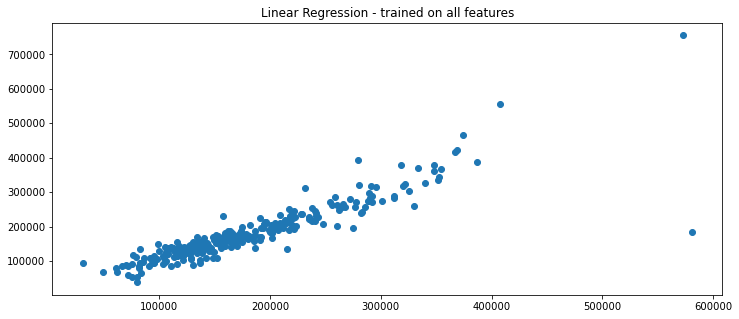

In [278]:
plt.figure(figsize=(12, 5))
plt.title("Linear Regression - trained on all features")
plt.scatter(all_feat_y_pred, y_test);

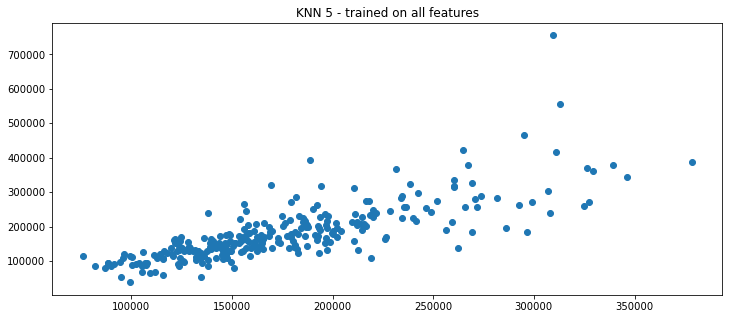

In [279]:
plt.figure(figsize=(12, 5))
plt.title("KNN 5 - trained on all features")
plt.scatter(y_pred_knn_5, y_test);